In [1]:
from pycaret.classification import * 
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score

# Importing the Data

In [3]:
file_path = "../Dataset/preprocessed.csv"
df = pd.read_csv(file_path)
df

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0          Monday              18-30          Male   Above high school   
1          Monday              31-50          Male  Junior high school   
2          Monday              18-30          Male  Junior high school   
3          Sunday              18-30          Male  Junior high school   
4          Sunday              18-30          Male  Junior high school   
...           ...                ...           ...                 ...   
12311   Wednesday              31-50          Male                 NaN   
12312      Sunday            Unknown          Male   Elementary school   
12313      Sunday            Over 51          Male  Junior high school   
12314      Sunday              18-30        Female  Junior high school   
12315      Sunday              18-30          Male  Junior high school   

      Driving_experience      Type_of_vehicle Owner_of_vehicle  \
0                  1-2yr           Automobile            Owner   
1             Above 10yr  Public (> 45 seats)            Owner   
2                  1-2yr      Lorry (41?100Q)            Owner   
3                 5-10yr  Public (> 45 seats)     Governmental   
4                  2-5yr                  NaN            Owner   
...                  ...                  ...              ...   
12311              2-5yr       Lorry (11?40Q)            Owner   
12312             5-10yr           Automobile            Owner   
12313             5-10yr                Bajaj            Owner   
12314         Above 10yr      Lorry (41?100Q)            Owner   
12315             5-10yr                Other            Owner   

      Service_year_of_vehicle Area_accident_occured  \
0                  Above 10yr     Residential areas   
1                     5-10yrs          Office areas   
2                         NaN    Recreational areas   
3                         NaN          Office areas   
4                     5-10yrs      Industrial areas   
...                       ...                   ...   
12311                     NaN   Outside rural areas   
12312                     NaN   Outside rural areas   
12313                  2-5yrs   Outside rural areas   
12314                  2-5yrs          Office areas   
12315                  2-5yrs   Outside rural areas   

                                       Lanes_or_Medians  \
0                                                   NaN   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                     Road_allignment Types_of_Junction  \
0                     Tangent road with flat terrain       No junction   
1                     Tangent road with flat terrain       No junction   
2                                                NaN       No junction   
3      Tangent road with mild grade and flat terrain           Y Shape   
4                     Tangent road with flat terrain           Y Shape   
...                                              ...               ...   
12311                 Tangent road with flat terrain       No junction   
12312                                    Escarpments       No junction   
12313      Tangent road with mountainous terrain and       No junction   
12314      Tangent road with mountainous terrain and       No junction   
12315      Tangent road with mountainous terrain and           O Shape   

      Road_surface_type Road_surface_conditions       Light_condi

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Driving_experience           11487 non-null  object
 5   Type_of_vehicle              11366 non-null  object
 6   Owner_of_vehicle             11834 non-null  object
 7   Service_year_of_vehicle      8388 non-null   object
 8   Area_accident_occured        12077 non-null  object
 9   Lanes_or_Medians             11931 non-null  object
 10  Road_allignment              12174 non-null  object
 11  Types_of_Junction            11429 non-null  object
 12  Road_surface_type            12144 non-null  object
 13  Road_surface_conditions      12

# Split Data into Train-Test Datasets

In [9]:
# create train - test datasets
data_train = df.sample(frac=0.80, random_state=42)
data_test = df.drop(data_train.index)

# reset row numbers \ indices
data_train.reset_index(inplace=True, drop=True)
data_test.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data_train.shape))
print('Unseen Data For Predictions: ' + str(data_test.shape))

Data for Modeling: (9853, 29)
Unseen Data For Predictions: (2463, 29)


# PyCaret Environment Setup

In [11]:
experiment = setup(data=data_train, 
                   target='Accident_severity',
                   numeric_features=['Number_of_vehicles_involved','Number_of_casualties','Hour','Minute'], 
                   session_id=42) 

# Comparing All Models
This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

We use a 3-fold cross validation and focus on the Accuracy-score metric

In [12]:
best_model = compare_models(fold=3, sort='Accuracy')

Looks like boosting models have taken up the leaderboard above!

What we will do next is focus on the top model and apply different data transformation techniques to see if it improves 
in terms of performance

# Profiling the Dataset

In [13]:
import pandas_profiling

In [14]:
report = pandas_profiling.ProfileReport(data_train)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Advanced Data Transformations

In this section we will setup another classification experiment but we will make some additional transformations to the dataset:

In [15]:
experiment2 = setup(data=data_train, 
                   target='Accident_severity',
                   session_id=42,
                   numeric_features=['Number_of_vehicles_involved','Number_of_casualties','Hour','Minute'],
                   imputation_type='iterative',
                   remove_multicollinearity=True,
                   multicollinearity_threshold=0.9,
                   fix_imbalance=True)

In [16]:
X_train = get_config('X_train')
X_train.head()

Number_of_vehicles_involved  Number_of_casualties  Hour  Minute  \
4092                          1.0                   1.0  19.0    45.0   
122                           2.0                   1.0  19.0    20.0   
179                           2.0                   1.0  11.0    30.0   
9114                          2.0                   1.0  14.0    30.0   
4385                          2.0                   2.0  15.0    30.0   

      Day_of_week_Friday  Day_of_week_Monday  Day_of_week_Saturday  \
4092                 0.0                 0.0                   0.0   
122                  1.0                 0.0                   0.0   
179                  0.0                 0.0                   0.0   
9114                 0.0                 0.0                   0.0   
4385                 1.0                 0.0                   0.0   

      Day_of_week_Sunday  Day_of_week_Thursday  Day_of_week_Tuesday  ...  \
4092                 0.0                   0.0                  1.0  ...   
122                  0.0                   0.0                  0.0  ...   
179                  0.0                   1.0                  0.0  ...   
9114                 0.0                   0.0                  0.0  ...   
4385                 0.0                   0.0                  0.0  ...   

      Cause_of_accident_No distancing  \
4092                              0.0   
122                               0.0   
179                               0.0   
9114                              0.0   
4385                              0.0   

      Cause_of_accident_No priority to pedestrian  \
4092                                          0.0   
122                                           0.0   
179                                           0.0   
9114                                          0.0   
4385                                          0.0   

      Cause_of_accident_No priority to vehicle  Cause_of_accident_Other  \
4092                                       0.0                      0.0   
122                                        0.0                      1.0   
179                                        0.0                      0.0   
9114                                       0.0                      0.0   
4385                                       1.0                      0.0   

      Cause_of_accident_Overloading  Cause_of_accident_Overspeed  \
4092                            0.0                          0.0   
122                             0.0                          0.0   
179                             0.0                          0.0   
9114                            0.0                          0.0   
4385                            0.0                          0.0   

      Cause_of_accident_Overtaking  Cause_of_accident_Overturning  \
4092                           0.0                            0.0   
122                            0.0                            0.0   
179                            0.0                            0.0   
9114                           0.0                            0.0   
4385                           0.0                            0.0   

      Cause_of_accident_Turnover  Cause_of_accident_Unknown  
4092                         0.0                        0.0  
122                          0.0                        0.0  
179                          0.0                        0.0  
9114                         0.0                        0.0  
4385                         0.0                        0.0  

[5 rows x 182 columns]

Here we build the top 5 models with our data transformation

In [17]:
best_model = compare_models(fold=3,include=['lightgbm', 'xgboost',	'gbc', 'et', 'rf'])

# Using the best model

The selection is based on the best model with the top F1-score:

```
- Extra Tree Classifier Model ('et')
```

In [18]:
extree = best_model

In [19]:
extree

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

# Tuning the Model

In [20]:
tuned_extree = tune_model(extree,fold=3)

In [24]:
tuned_extree

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=9, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

Looks like Tuning didn't yield any significant improvement.

# Ensembling ML Models

### Create a simple decision tree model

In [21]:
dt = create_model('dt',fold=3)

### Ensemble Model by Bagging

Trains Multiple Models independently in parallel and combines their predictions to build one big model

In [22]:
bagged_dt = ensemble_model(estimator=dt, fold=3, n_estimators=10)

### Ensemble model by Boosting

Trains multiple models sequentially where one model tries to learn from the mistakes of the previous model, and combines their predictions to build one big model

In [23]:
boosted_dt = ensemble_model(estimator=dt, fold=3, n_estimators=10, method='Boosting')

### Ensemble Model by blending

This function trains a Soft Voting / Hard Voting Majority rule classifier for select models passed in the `estimator_list` parameter

In [24]:
# Train individual models to blend
lightgbm = create_model('lightgbm',fold=3, verbose=False)
e_tree = create_model('et',fold=3, verbose=False)
rf = create_model('rf',fold=3, verbose=False) 

In [25]:
# blend individual models based on soft labeling i.e predicted probabilities
blend_soft = blend_models(estimator_list=[lightgbm, e_tree, rf], method='soft', optimize='Accuracy', fold=3)

In [26]:
blend_hard  = blend_models(estimator_list=[lightgbm, e_tree, rf], method='hard', optimize='Accuracy', fold=3)

### Ensemble model by Stacking

This function trains a meta_model over select estimators passed in the `estimator_list` parameter. Which means predictions of the initial model go as inputs into the meta model which makes the final predictions

In [27]:
dt_meta = create_model('dt', fold=3, verbose=False)
stack_soft1 = stack_models(estimator_list=[lightgbm, e_tree, rf], 
                           meta_model=dt_meta, optimize='Accuracy', 
                           meta_model_fold=3, fold=3)

# Plot ML Model Evaluation Diagnostics

We will use `extree model` for the Evaluation

### Confusion Matrix

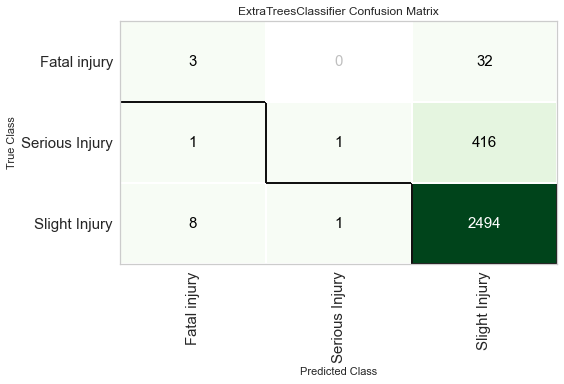

In [28]:
plot_model(tuned_extree, plot='confusion_matrix')

### Feature Importance

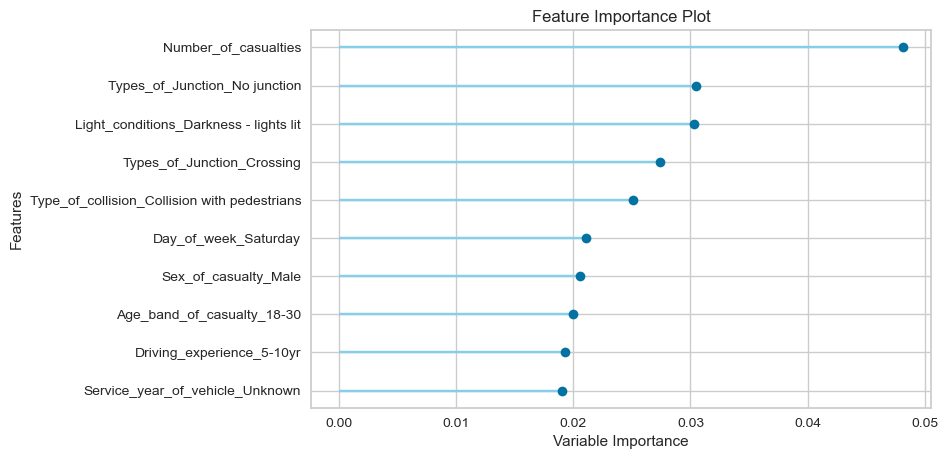

In [29]:
plot_model(tuned_extree, plot='feature')

### Classification Report

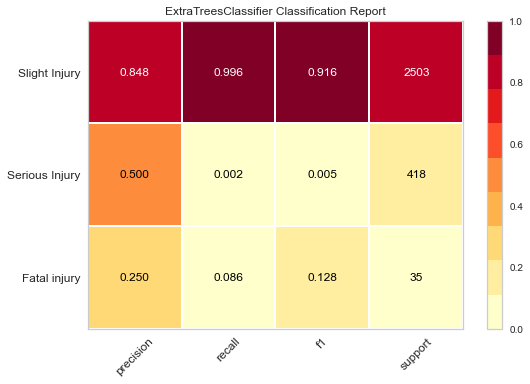

In [30]:
plot_model(tuned_extree, plot='class_report')

Another way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [31]:
evaluate_model(tuned_extree)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpret ML models with XAI

## SHAP Summary Plot
Shows effects of each feature on model predictions based on SHAP values for the entire test dataset. 

Positive values have a positive influence on model (pushes it to predict the positive class) and negative values have a negative influence on the model (pushes it to predict the negative class)

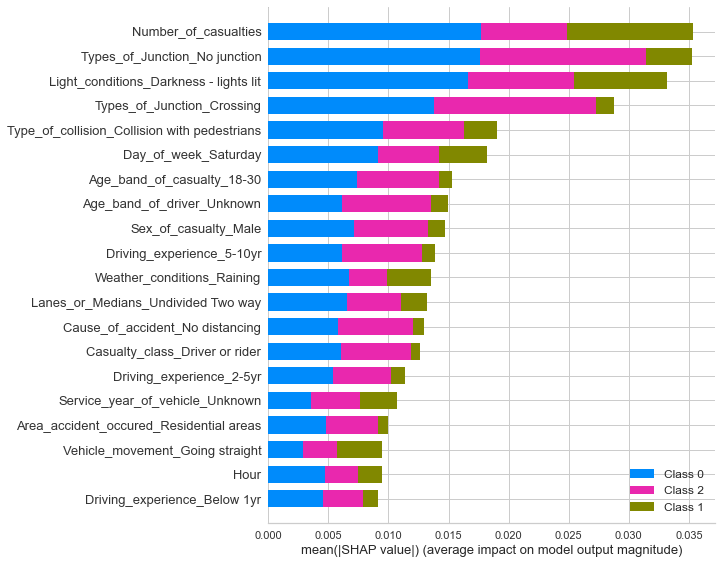

In [32]:
interpret_model(tuned_extree,plot='summary')

## SHAP Reasoning Plot
Shows effects of specific features on model predictions based on SHAP values for a specific row of the test dataset.

Positive values have a positive influence on model (pushes it to predict the positive class) and negative values have a negative influence on the model (pushes it to predict the negative class)

In [33]:
predict_model(tuned_extree, data=data_test.iloc[5:6],verbose=False)

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
5    Thursday              31-50          Male  Junior high school   

  Driving_experience  Type_of_vehicle Owner_of_vehicle  \
5             5-10yr  Lorry (41?100Q)            Owner   

  Service_year_of_vehicle Area_accident_occured Lanes_or_Medians  ...  \
5              Above 10yr          Office areas            other  ...   

  Sex_of_casualty Age_band_of_casualty Casualty_severity Pedestrian_movement  \
5              na                   na                na    Not a Pedestrian   

        Cause_of_accident Accident_severity Hour  Minute          Label  \
5  No priority to vehicle     Slight Injury   17      45  Slight Injury   

    Score  
5  0.5166  

[1 rows x 31 columns]

In [34]:
interpret_model(tuned_extree, plot='reason',X_new_sample=data_test.iloc[5:6])

# Predict on Test / Hold-out Sample

In [ ]:
results = predict_model(tuned_extree)

# Finalize model for deployment

In [39]:
final_extree = finalize_model(tuned_extree)
final_extree

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=9, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

# Predict on Unseen / new data

In [ ]:
new_predictions = predict_model(final_extree,data=data_test)


In [41]:
Accuracy = accuracy_score(new_predictions['Accident_severity'], new_predictions['Label'])
Accuracy

0.8485586682907024

In [42]:
new_predictions.head()

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0      Monday              31-50          Male  Junior high school   
1      Sunday              18-30          Male  Junior high school   
2      Friday              31-50          Male                 NaN   
3      Friday              18-30          Male  Junior high school   
4    Saturday              31-50          Male   Above high school   

  Driving_experience      Type_of_vehicle Owner_of_vehicle  \
0         Above 10yr  Public (> 45 seats)            Owner   
1              2-5yr                  NaN            Owner   
2                NaN                  NaN              NaN   
3              1-2yr           Automobile            Owner   
4         No Licence           Automobile            Owner   

  Service_year_of_vehicle Area_accident_occured   Lanes_or_Medians  ...  \
0                 5-10yrs          Office areas  Undivided Two way  ...   
1                 5-10yrs      Industrial areas              other  ...   
2                     NaN                   NaN                NaN  ...   
3                  2-5yrs     Residential areas  Undivided Two way  ...   
4                     NaN          Office areas  Undivided Two way  ...   

  Sex_of_casualty Age_band_of_casualty Casualty_severity Pedestrian_movement  \
0              na                   na                na    Not a Pedestrian   
1              na                   na                na    Not a Pedestrian   
2            Male                31-50                 3    Not a Pedestrian   
3            Male                18-30                 3    Not a Pedestrian   
4            Male                18-30                 3    Not a Pedestrian   

           Cause_of_accident Accident_severity Hour  Minute          Label  \
0                 Overtaking     Slight Injury   17       5  Slight Injury   
1                 Overtaking     Slight Injury    1      10  Slight Injury   
2                Overloading     Slight Injury   14      15  Slight Injury   
3            Moving Backward    Serious Injury   17      20  Slight Injury   
4  No priority to pedestrian    Serious Injury   14      40  Slight Injury   

    Score  
0  0.4631  
1  0.4481  
2  0.4366  
3  0.4061  
4  0.3670  

[5 rows x 31 columns]

# Saving ML model

In [43]:
save_model(final_extree,'extree_model_20220727')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Number_of_vehicles_involved',
                                                           'Number_of_casualties',
                                                           'Hour', 'Minute'],
                                       target='Accident_severity',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    cl...
                  ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight={}, criterion='entropy',
                                

# Load Saved ML model for future use

In [44]:
trained_extree = load_model('extree_model_20220727')

Transformation Pipeline and Model Successfully Loaded


In [45]:
trained_extree

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Number_of_vehicles_involved',
                                                          'Number_of_casualties',
                                                          'Hour', 'Minute'],
                                      target='Accident_severity',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   cl...
                 ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                      class_weight={}, criterion='entropy',
                                      max_depth=